In [238]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [239]:
data = pd.read_csv('dataset/stretched/train.csv')
test_data = pd.read_csv('dataset/stretched/test.csv')

X = data.copy()
y = X.pop('target')
X_test = test_data.copy()
y_test = X_test.pop('target')

std = StandardScaler()
std.fit(X)
X = pd.DataFrame(std.transform(X), columns = X.columns)
X_test = pd.DataFrame(std.transform(X_test), columns = X_test.columns)

In [240]:
X_train = X
y_train = y

## Selection

In [241]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# uni = SelectKBest(score_func = f_classif, k = 15)
# fit = uni.fit(X, y)

# X.columns[fit.get_support(indices=True)].tolist()

# X_train = X[X.columns[fit.get_support(indices=True)].tolist()]
# X_test = X_test[X.columns[fit.get_support(indices=True)].tolist()]

In [242]:
# from sklearn.feature_selection import SelectFromModel

# sel = SelectFromModel(rfc,prefit=True)
# sel.transform(X_train)
# selected_feat= X_train.columns[(sel.get_support())]
# print(selected_feat)

## Testing

In [243]:
rfc = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=12, criterion='entropy')

rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

report = classification_report(y_test, y_pred, output_dict = True)
cr = pd.DataFrame(report).transpose()
print(cr)

              precision    recall  f1-score     support
fatty          0.721154  0.806452  0.761421   93.000000
normal         0.700000  0.591549  0.641221   71.000000
accuracy       0.713415  0.713415  0.713415    0.713415
macro avg      0.710577  0.699000  0.701321  164.000000
weighted avg   0.711996  0.713415  0.709384  164.000000


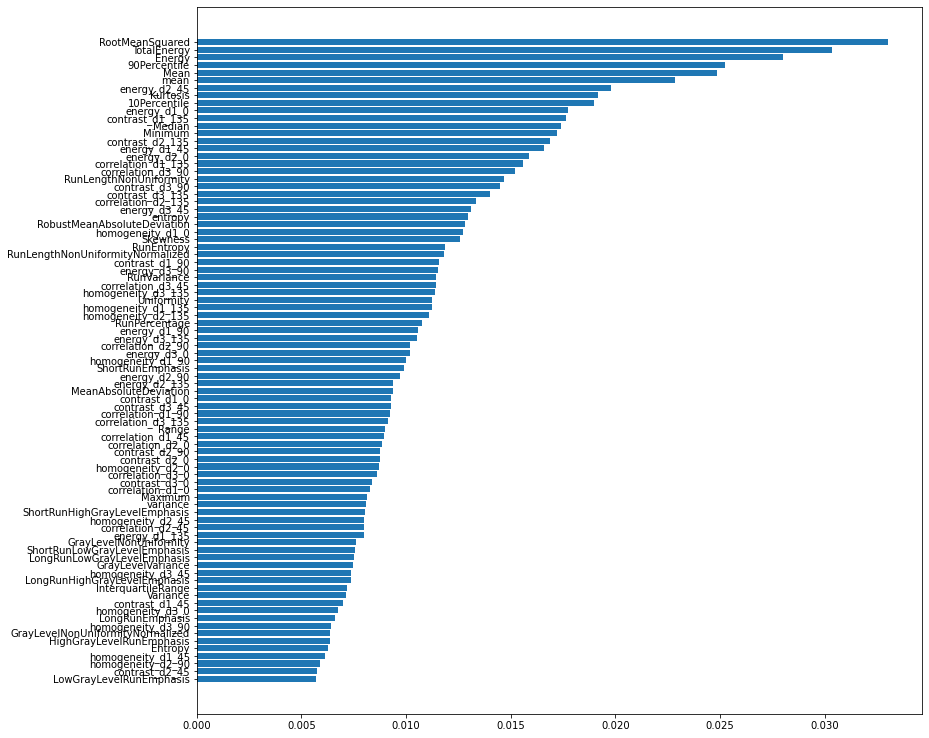

In [244]:
f_i = list(zip(X_train.columns,rfc.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.figure(figsize=(13,13))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])


plt.show()

In [245]:
mlpc = MLPClassifier(
                    max_iter=300,
                    momentum=0.6,
                    solver='adam',
                    activation='relu',
                    learning_rate_init=0.005,
                    alpha=0.001)

mlpc = mlpc.fit(X_train[selected_feat],y_train)
y_pred = mlpc.predict(X_test[selected_feat])
report = classification_report(y_test, y_pred, output_dict = True)
cr = pd.DataFrame(report).transpose()
print(cr)

              precision    recall  f1-score     support
fatty          0.788235  0.720430  0.752809   93.000000
normal         0.670886  0.746479  0.706667   71.000000
accuracy       0.731707  0.731707  0.731707    0.731707
macro avg      0.729561  0.733454  0.729738  164.000000
weighted avg   0.737432  0.731707  0.732833  164.000000


In [246]:
clf = svm.SVC()

clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.fit(X_train, y_train)

report = classification_report(y_test, y_pred, output_dict = True)
cr = pd.DataFrame(report).transpose()
print(cr)

              precision    recall  f1-score    support
fatty          0.740000  0.795699  0.766839   93.00000
normal         0.703125  0.633803  0.666667   71.00000
accuracy       0.725610  0.725610  0.725610    0.72561
macro avg      0.721562  0.714751  0.716753  164.00000
weighted avg   0.724036  0.725610  0.723472  164.00000


In [247]:
cr['precision']['accuracy']

0.725609756097561